In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     12970 non-null  object 
 1   Destination   12970 non-null  object 
 2   Age           12970 non-null  float64
 3   VIP           12970 non-null  object 
 4   RoomService   12970 non-null  float64
 5   FoodCourt     12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   VRDeck        12970 non-null  float64
 9   Transported   8693 non-null   float64
 10  Deck          12970 non-null  object 
 11  Side          12970 non-null  object 
 12  HomePlanet    12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.3+ MB


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
# Data to be predicted
desired_col = df[df['Transported'].isnull()]
desired_col = desired_col.drop(['Transported'], axis = 1)

In [6]:
desired_col.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_None,CryoSleep_True,Destination_None,Destination_PSO J318.5-22,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
8693,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
8694,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8695,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
8696,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8697,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [7]:
#Training data
tr_data = df.copy()
tr_data = tr_data.dropna()

In [8]:
tr_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_None,CryoSleep_True,Destination_None,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
X = tr_data.drop('Transported', axis = 1)
y = tr_data['Transported']

In [10]:
y = y.astype('int64')

## KNN

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
scaler = StandardScaler()

In [14]:
knn = KNeighborsClassifier()

In [15]:
operations = [('scaler',scaler),('knn',knn)]

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
pipe = Pipeline(operations)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
k_values = list(range(1,20))

In [20]:
param_grid = {'knn__n_neighbors': k_values}

In [21]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [23]:
full_cv_classifier.fit(X_cv,y_cv)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [24]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=15))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=15),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [25]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.72044552, 0.72921898, 0.75049998, 0.75208426, 0.75869893,
       0.76172   , 0.76574598, 0.76286994, 0.76517024, 0.76200777,
       0.76416459, 0.76301351, 0.76042617, 0.76287046, 0.76588956,
       0.76445092, 0.76445195, 0.76545904, 0.76473931])

Text(0, 0.5, 'Accuracy')

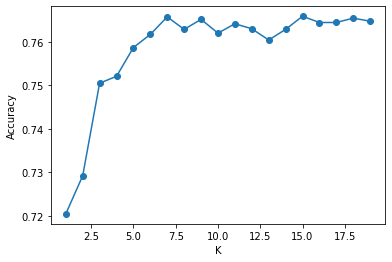

In [26]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [27]:
pred = full_cv_classifier.predict(X_test)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [29]:
confusion_matrix(y_test,pred)

array([[708, 181],
       [195, 655]], dtype=int64)

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       889
           1       0.78      0.77      0.78       850

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


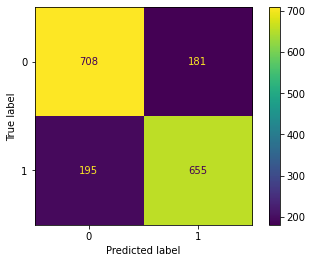

In [31]:
plot_confusion_matrix(full_cv_classifier,X_test,y_test);

In [62]:
scaler = StandardScaler()
knn15 = KNeighborsClassifier(n_neighbors=15)
operations = [('scaler',scaler),('knn15',knn15)]

In [63]:
pipe = Pipeline(operations)

In [64]:
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn15', KNeighborsClassifier(n_neighbors=15))])

In [65]:
pipe_pred = pipe.predict(X)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [66]:
print(classification_report(y,pipe_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4315
           1       0.82      0.79      0.80      4378

    accuracy                           0.81      8693
   macro avg       0.81      0.81      0.81      8693
weighted avg       0.81      0.81      0.81      8693



In [67]:
result = pipe.predict(desired_col)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [68]:
test = pd.read_csv('test.csv')

In [69]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':result})
submission['Transported'] = submission['Transported'].astype(int)
print(submission.shape)

(4277, 2)


In [70]:
submission['Transported'].value_counts()

0    2226
1    2051
Name: Transported, dtype: int64

In [71]:
submission['Transported'] = submission['Transported'].astype('bool')

In [72]:
filename = 'space_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: space_preds.csv
